In [6]:
from  skimage.io import imread, imshow
import pywt
import pywt.data
import matplotlib.pyplot as plt
import numpy as np
import glob
import gmm
from tqdm import tqdm
import json
import os
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
import matplotlib.pyplot as plt
import dbscan
from kmeans import kmeans
from dbscan import db_scan
from gmm import gmm
from sim_matrix import generate_matrix_score

In [10]:
rutas_pca = glob.glob('./matrices_imagenes/' + "*.npy")
diccionario_pca = {}
for ruta in rutas_pca:
  if len(ruta.split('_')) > 1:
    diccionario_pca[os.path.splitext(os.path.basename(ruta))[0]] = np.load(ruta)

In [17]:
rutas_images = glob.glob('./imagenes/*.png' )
labels_for_images = np.load('images_labels/labels_for_images.npy')
mapping_for_label = np.load('images_labels/mapping_for_label.npy')


Counter({1: 924, 4: 27, 2: 12, 5: 12, 3: 6})
El rand index es: 0.2635087062347875


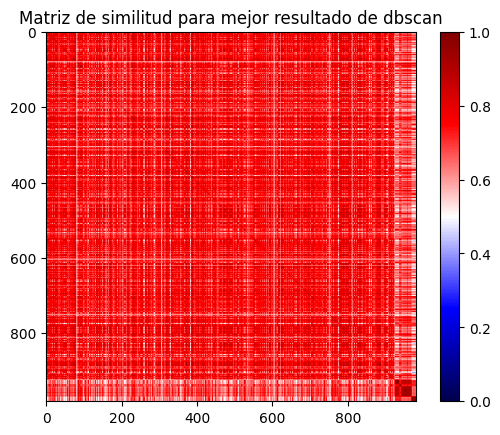

In [31]:
#Mejores resultados dbscan
from collections import Counter 
X_dbscan = diccionario_pca['caracteristicos4_pca0.9']
clases = db_scan(X_dbscan,600,3) 



print(Counter(clases))
sim_matrix = generate_matrix_score(X_dbscan,clases)

rand_index = rand_score(labels_for_images,clases)

print(f'El rand index es: {rand_index}')


im = plt.imshow(sim_matrix,cmap='seismic')
plt.colorbar()
plt.title('Matriz de similitud para mejor resultado de dbscan')
plt.savefig('./resultados_finales/sim_matrix_dbscan')



Using kmeans from sklearn
Estamos en la epoca 0
Estamos en la epoca 100
Estamos en la epoca 200
Estamos en la epoca 300
Estamos en la epoca 400
Estamos en la epoca 500
Estamos en la epoca 600
Estamos en la epoca 700
Estamos en la epoca 800
Estamos en la epoca 900
El rand index es: 0.47762591275042127


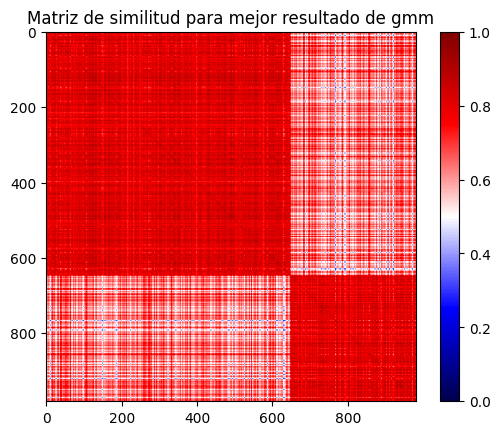

In [37]:
#Mejores resultados gmm
X_gmm = diccionario_pca['caracteristicos4_pca0.9']
clases = gmm(X_gmm,1000,2) 


sim_matrix = generate_matrix_score(X_gmm,clases)

rand_index = rand_score(labels_for_images,clases)

print(f'El rand index es: {rand_index}')

im = plt.imshow(sim_matrix,cmap='seismic')
plt.colorbar()
plt.title('Matriz de similitud para mejor resultado de gmm')
plt.savefig('./resultados_finales/sim_matrix_gmm')

CENTROIDE LISTO
Counter({0: 731, 1: 221, 2: 29})
981
981
CLUSTERS LISTOS
NUEVOS CENTROIDES
1 1218.6360664087954
2 675.0712388668109
3 271.5741833033347
4 117.14299055243464
5 98.36497534047344
6 152.2624679258124
7 102.12018900979716
8 93.44123182591936
9 75.99139840158217
10 9.431218814291846
11 9.318738720967245
12 0.0
El rand index es: 0.599858536686846


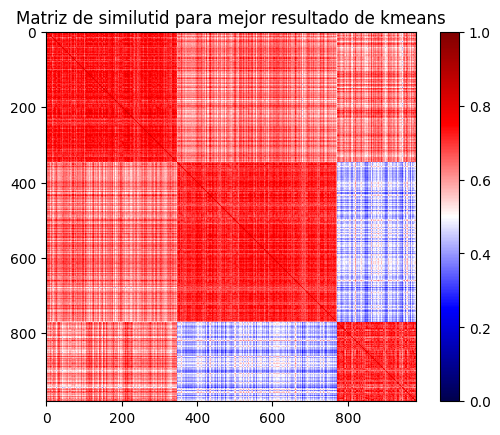

In [36]:
#Mejores resultados kmeans
X_kmeans = diccionario_pca['caracteristicos2_pca0.95']
_,clases = kmeans(X_kmeans,3,0.3,1)


sim_matrix = generate_matrix_score(X_kmeans,clases)

rand_index = rand_score(labels_for_images,clases)

print(f'El rand index es: {rand_index}')

plt.title('Matriz de similutid para mejor resultado de kmeans')
im = plt.imshow(sim_matrix,cmap='seismic')
plt.colorbar()

plt.savefig('./resultados_finales/sim_matrix_kmeans')